In [1]:
import os
import glob
import re
import pandas as pd
from IPython.display import display

In [2]:
# Reading csv files from ETF_data folder
csv_files = glob.glob(os.path.join("ETF_data", "*.csv"))
df_list = []

# For each csv file extract the ETF name using regex and add the name to the a new column called "ETF"
# Add each csv file to df_list
for file in csv_files:
    df = pd.read_csv(file)
    match = re.search(r"/([^/]+)\.csv$", file)
    if match:
        ETF_str = match.group(1)
        df["ETF"] = ETF_str
    df_list.append(df)

# Remove any empty data frames
df_list = [df for df in df_list if not df.empty]

# Combine all data frames into one master data frame
master_df = pd.concat(df_list, ignore_index=True)
master_df.dropna(inplace=True)
master_df

,Date,Adj Close,Close,High,Low,Open,Volume,ETF
0,2007-11-07,418.000000,418.000000,454.200012,384.000000,390.000000,595380.0,ANTE
1,2007-11-08,380.000000,380.000000,407.000000,370.000000,390.000000,162105.0,ANTE
2,2007-11-09,388.000000,388.000000,394.600006,364.000000,370.000000,84805.0,ANTE
3,2007-11-12,371.200012,371.200012,386.000000,360.000000,360.000000,62680.0,ANTE
4,2007-11-13,360.000000,360.000000,377.600006,360.000000,366.200012,90480.0,ANTE
...,...,...,...,...,...,...,...,...
18387217,2025-01-30,50.630001,50.630001,52.270000,48.650002,50.029999,4578200.0,NXT
18387218,2025-01-31,50.419998,50.419998,52.139999,50.395000,51.130001,2389700.0,NXT
18387219,2025-02-03,48.599998,48.599998,49.430000,47.750000,48.320000,2570700.0,NXT
18387220,2025-02-04,49.750000,49.750000,50.340000,47.660000,48.820000,2268300.0,NXT


In [3]:
# Data inspection
print(master_df.shape[0])
print(master_df.columns.tolist())
print(len(etfList := master_df["ETF"].unique()))
display(master_df.head())
display(master_df.tail())

18387222
['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'ETF']
6691


,Date,Adj Close,Close,High,Low,Open,Volume,ETF
0,2007-11-07,418.000000,418.000000,454.200012,384.0,390.000000,595380.0,ANTE
1,2007-11-08,380.000000,380.000000,407.000000,370.0,390.000000,162105.0,ANTE
2,2007-11-09,388.000000,388.000000,394.600006,364.0,370.000000,84805.0,ANTE
3,2007-11-12,371.200012,371.200012,386.000000,360.0,360.000000,62680.0,ANTE
4,2007-11-13,360.000000,360.000000,377.600006,360.0,366.200012,90480.0,ANTE


,Date,Adj Close,Close,High,Low,Open,Volume,ETF
18387217,2025-01-30,50.630001,50.630001,52.270000,48.650002,50.029999,4578200.0,NXT
18387218,2025-01-31,50.419998,50.419998,52.139999,50.395000,51.130001,2389700.0,NXT
18387219,2025-02-03,48.599998,48.599998,49.430000,47.750000,48.320000,2570700.0,NXT
18387220,2025-02-04,49.750000,49.750000,50.340000,47.660000,48.820000,2268300.0,NXT
18387221,2025-02-05,46.970001,46.970001,48.950001,46.700001,48.590000,5242265.0,NXT


In [4]:
etf_key = "SPY"
df_sample = master_df[master_df["ETF"] == etf_key]
print("Preview of data for:", etf_key)
display(df_sample.head())
display(df_sample.describe())
print(df_sample.info())

Preview of data for: SPY


,Date,Adj Close,Close,High,Low,Open,Volume,ETF
12476533,1993-01-29,24.526075,43.93750,43.96875,43.75000,43.96875,1003200.0,SPY
12476534,1993-02-01,24.700508,44.25000,44.25000,43.96875,43.96875,480500.0,SPY
12476535,1993-02-02,24.752840,44.34375,44.37500,44.12500,44.21875,201300.0,SPY
12476536,1993-02-03,25.014505,44.81250,44.84375,44.37500,44.40625,529400.0,SPY
12476537,1993-02-04,25.119162,45.00000,45.09375,44.46875,44.96875,531500.0,SPY


,Adj Close,Close,High,Low,Open,Volume
count,8061.000000,8061.000000,8061.000000,8061.000000,8061.000000,8.061000e+03
mean,153.979317,183.271155,184.328497,182.083554,183.261348,8.352962e+07
std,131.481686,125.253676,125.830171,124.570170,125.229483,9.096418e+07
min,24.229548,43.406250,43.531250,42.812500,43.343750,5.200000e+03
25%,70.600899,106.980003,107.709999,105.937500,107.000000,1.092270e+07
50%,94.236382,133.779999,134.843750,132.949997,133.880005,6.232230e+07
75%,200.520935,227.770004,229.330002,227.000000,228.190002,1.132588e+08
max,609.750000,609.750000,610.780029,607.020020,609.809998,8.710263e+08


<class 'pandas.core.frame.DataFrame'>
Index: 8061 entries, 12476533 to 12484593
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8061 non-null   object 
 1   Adj Close  8061 non-null   float64
 2   Close      8061 non-null   float64
 3   High       8061 non-null   float64
 4   Low        8061 non-null   float64
 5   Open       8061 non-null   float64
 6   Volume     8061 non-null   float64
 7   ETF        8061 non-null   object 
dtypes: float64(6), object(2)
memory usage: 566.8+ KB
None


In [5]:
summary_stats = master_df.groupby('ETF').describe().round(2)
print("\nSummary Statistics by ETF:")
summary_stats.head()


Summary Statistics by ETF:


Adj Close                                                     Close  \
         count   mean    std    min    25%    50%    75%     max   count   
ETF                                                                        
A       6342.0  49.55  42.40   6.54  19.86  30.32  66.19  175.16  6342.0   
AAA     1108.0  22.22   1.30  20.85  21.25  21.40  23.36   25.13  1108.0   
AAAU    1628.0  18.14   3.51  11.74  16.31  18.05  19.45   28.31  1628.0   
AADR    3660.0  42.41  12.19  21.78  32.88  42.35  52.06   75.32  3660.0   
AAL     4871.0  23.29  14.76   1.66  11.06  18.07  36.37   59.35  4871.0   

             ...   Open          Volume                                      \
       mean  ...    75%     max   count         mean          std       min   
ETF          ...                                                              
A     52.50  ...  69.55  179.28  6342.0   3312193.93   2389285.69  271900.0   
AAA   24.85  ...  25.06   25.40  1108.0      4402.20     10863.08       0.0   
AAAU  18.14  ...  19.45   28.35  1628.0    940626.44   1174417.85     100.0   
AADR  45.57  ...  55.30   75.27  3660.0      8010.54     16666.03       0.0   
AAL   24.15  ...  38.00   62.70  4871.0  16154541.47  21927577.85  138500.0   

                                                       
             25%        50%          75%          max  
ETF                                                    
A     1806678.75  2803874.0   4145699.25   62546380.0  
AAA       200.00     1050.0      4400.00     182900.0  
AAAU   160450.00   512350.0   1385675.00   14338200.0  
AADR      600.00     2000.0      7300.00     323800.0  
AAL   4950850.00  8385400.0  20216000.00  428617100.0  

[5 rows x 48 columns]

In [6]:
# Checking for null values
master_df.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
ETF          0
dtype: int64

In [7]:
# Checking for duplicate values
# True indicates that there is no dupe values as the number of Falses should be equivalent to the size of the data frame
master_df.duplicated().to_list().count(False) == len(master_df)

True

In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import random

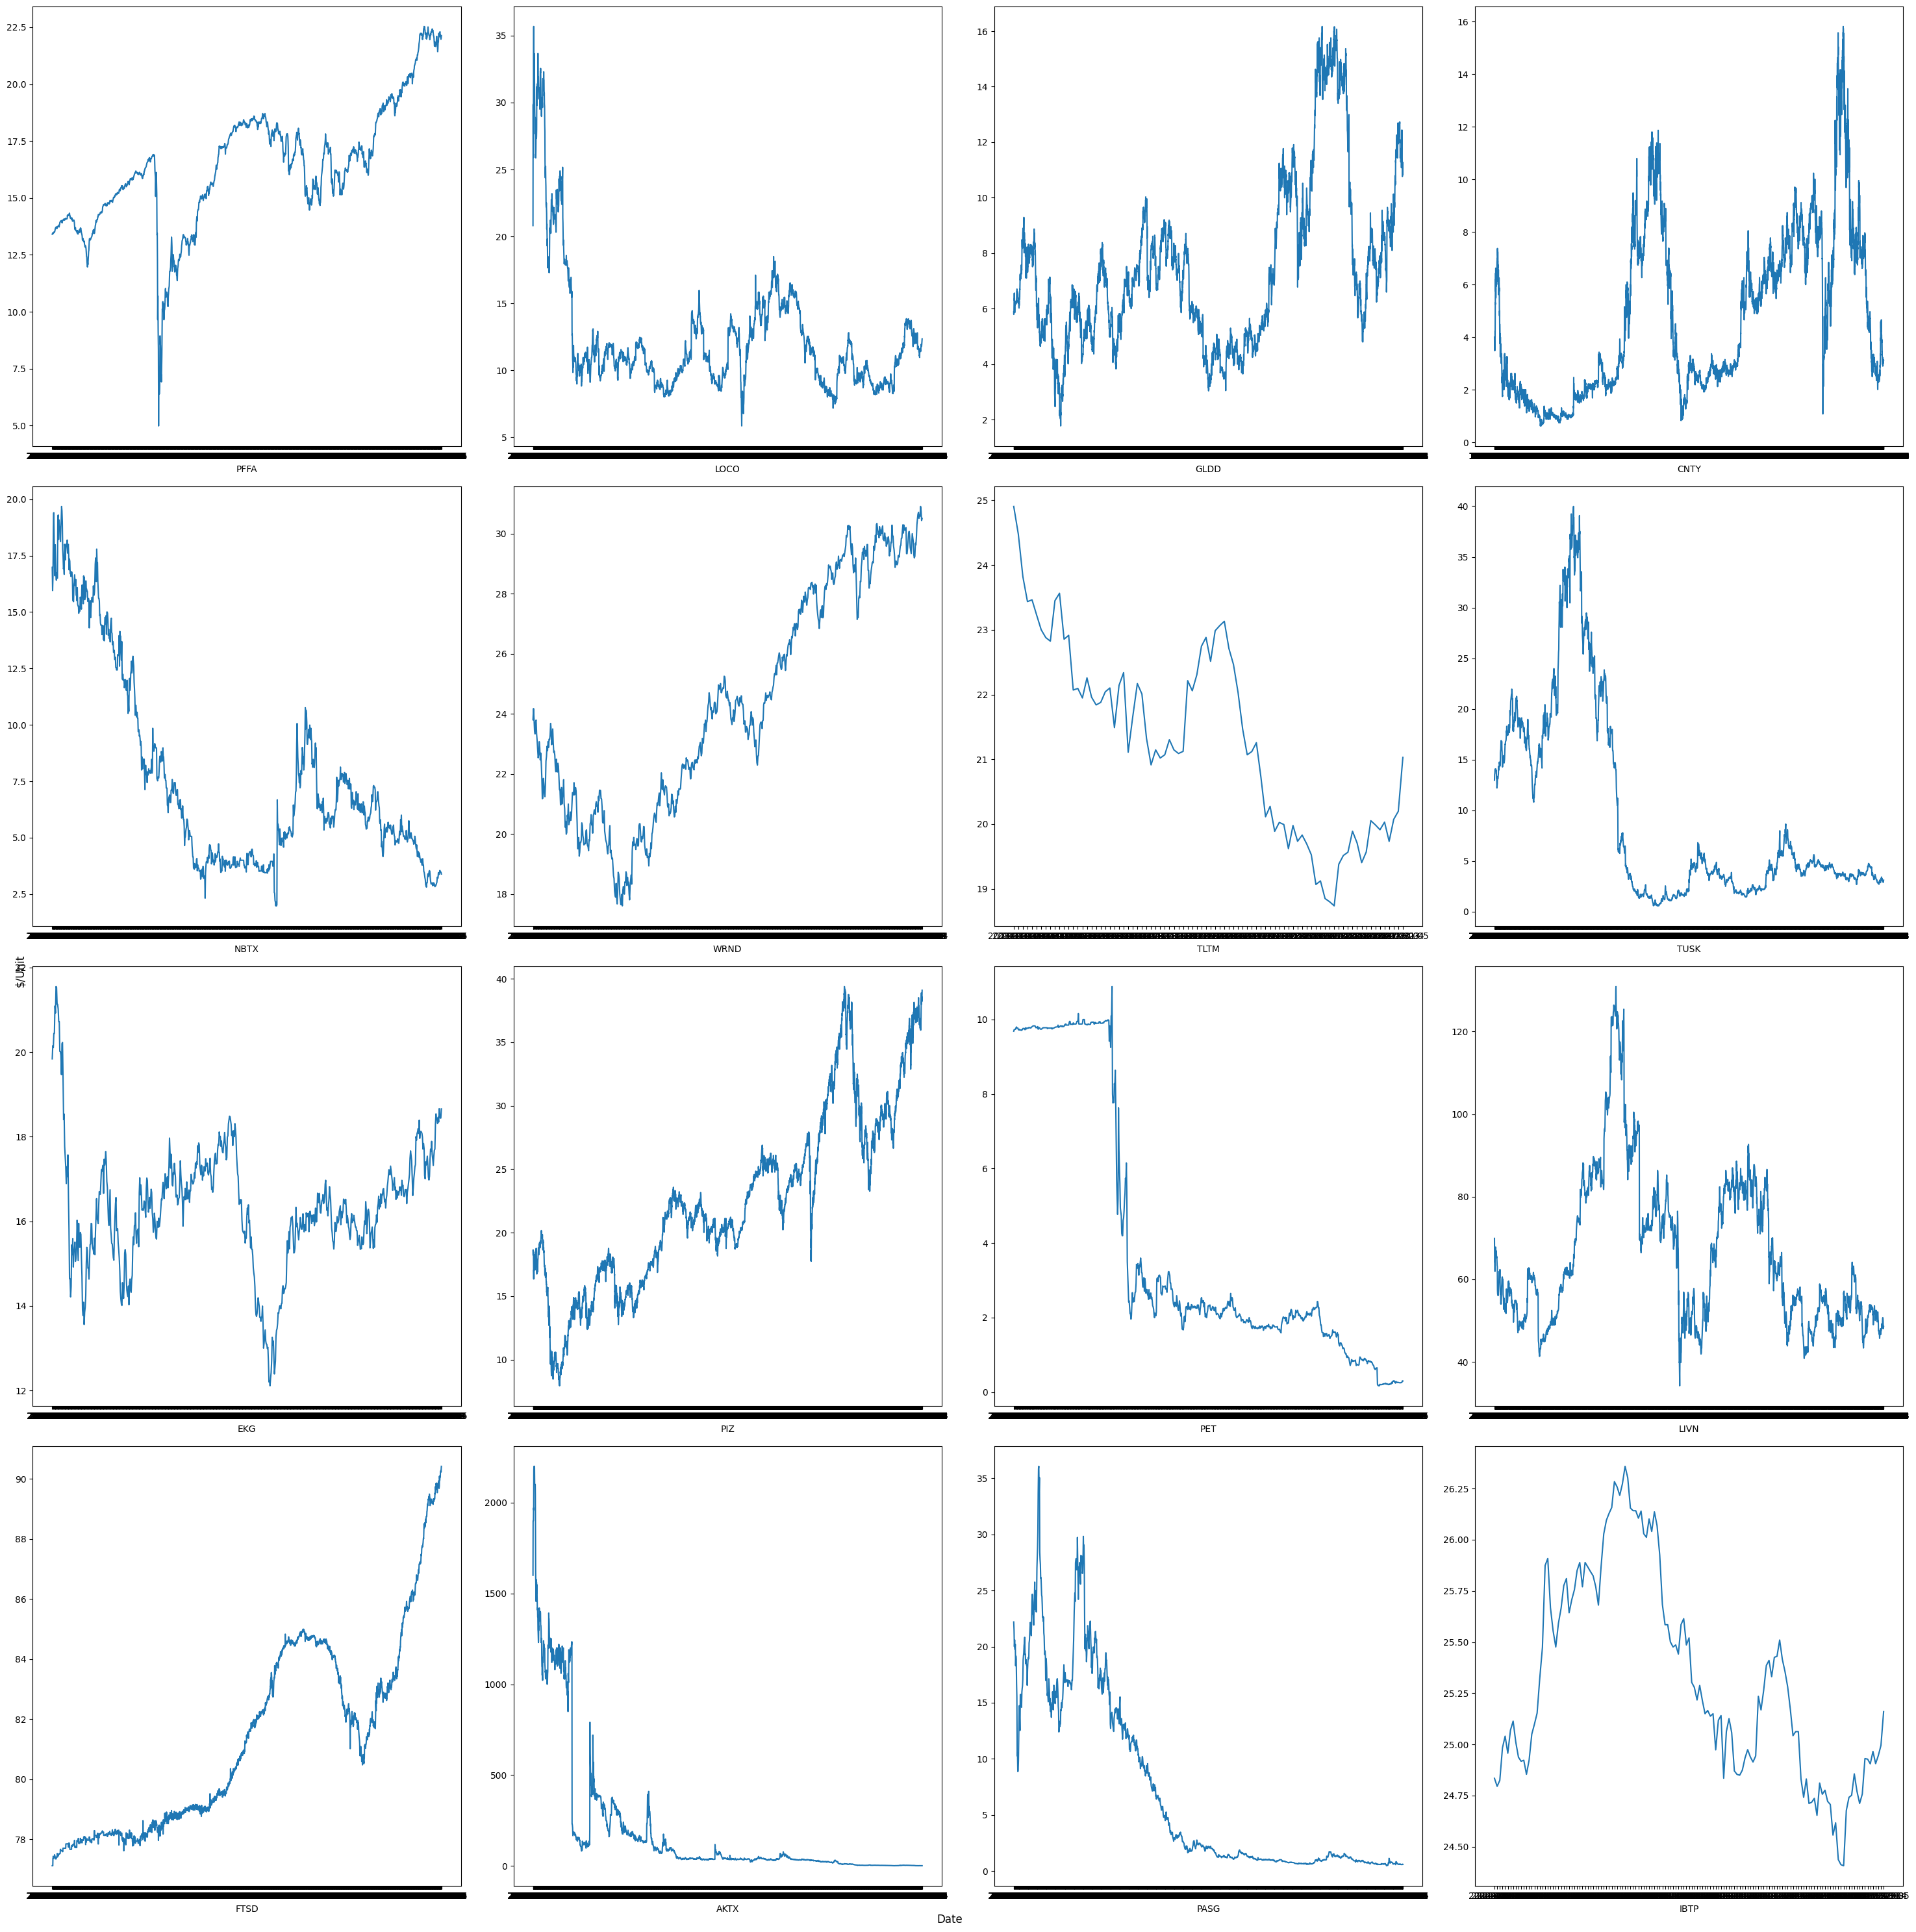

In [9]:
fig, axs = plt.subplots(4, 4, figsize=(30, 30))

for i in range(16):
    randomInt = random.randint(0, len(etfList))
    
    row = i // 4
    col = i % 4

    df_etf = master_df[master_df['ETF'] == etfList[randomInt]].copy()
    axs[row, col].plot(df_etf['Date'], df_etf['Adj Close'])
    axs[row, col].set_xlabel(etfList[randomInt])
    
# Tidy up layout so the plots don’t overlap
fig.supylabel("$/Unit")
fig.supxlabel("Date")
plt.tight_layout()
plt.show()

In [10]:
def changeAdjClosePrice(etf: str):
    df_etf = master_df[master_df['ETF'] == etf].copy()
    df_etf.sort_values('Date', inplace=True)
    plt.figure(figsize=(8, 4))
    plt.plot(df_etf['Date'], df_etf['Adj Close'])
    plt.title(f"Adj Closing Price Over Time - {etf}")
    plt.xlabel("Date")
    plt.ylabel("$/Unit")
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(7))
    plt.tight_layout()
    plt.show()

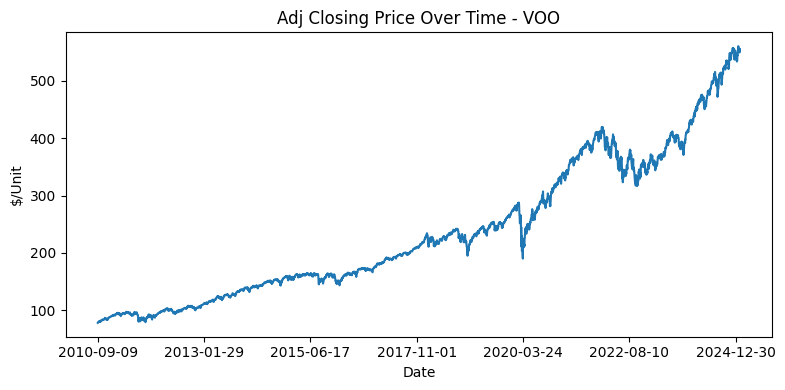

In [11]:
changeAdjClosePrice("VOO")

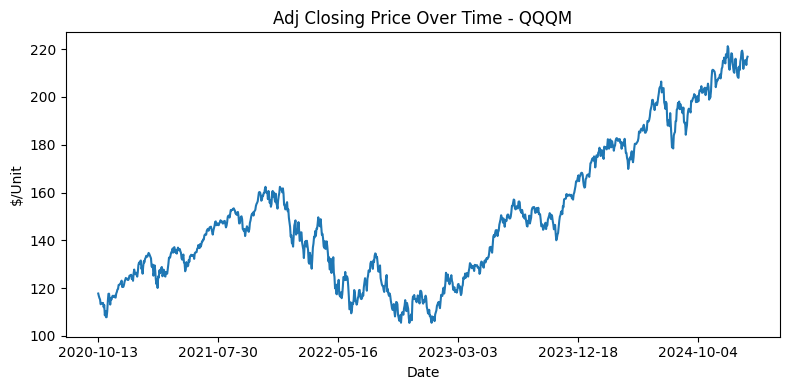

In [14]:
changeAdjClosePrice("QQQM")

In [12]:
#master_df.to_csv('master_etf.csv', index=False)